### Importing the dataset

In [10]:
import pandas as pd

In [11]:
df=pd.read_excel("C:/Users/arunj/Downloads/financial Analysis.xlsx", sheet_name=["MSFT","TSLA","AAPL"],index_col=0)
df

{'MSFT':                      2023    2022    2021
 MSFT                                     
 Total Revenue      211915  198270  168088
 Net Income          72361   72738   61271
 Total Assets       411976  364840  333779
 Total Liabilities  205753  198298  191791
 Cash Flow           87582   89035   76740,
 'TSLA':                      2023   2022   2021
 TSLA                                   
 Total Revenue       96773  81462  53823
 Net Income          14974  12587   5644
 Total Assets       106618  82338  62131
 Total Liabilities   43009  36440  30548
 Cash Flow           14974  12587   5644,
 'AAPL':                      2023    2022    2021
 AAPL                                     
 Total Revenue      383285  394328  365817
 Net Income          96995   99803   94680
 Total Assets       352583  352755  351002
 Total Liabilities  290437  302083  287912
 Cash Flow          110543  122151  104038}

### Dictionary of financial variables

In [12]:
financial_data_comparison={}
financial_figures=df['MSFT'].index.tolist()
i=0
for ele in financial_figures:
    ff_df=pd.DataFrame()
    for item in df:
        tdf=pd.DataFrame(df[item].iloc[i,:])
        ff_df=pd.concat([ff_df,tdf], axis=1)
    ff_df.columns=[list(df.keys())]
    ff_df=pd.DataFrame.from_dict(ff_df)
    financial_data_comparison[ele]=ff_df
    i=i+1
financial_data_comparison

{'Total Revenue':         MSFT   TSLA    AAPL
 2023  211915  96773  383285
 2022  198270  81462  394328
 2021  168088  53823  365817,
 'Net Income':        MSFT   TSLA   AAPL
 2023  72361  14974  96995
 2022  72738  12587  99803
 2021  61271   5644  94680,
 'Total Assets':         MSFT    TSLA    AAPL
 2023  411976  106618  352583
 2022  364840   82338  352755
 2021  333779   62131  351002,
 'Total Liabilities':         MSFT   TSLA    AAPL
 2023  205753  43009  290437
 2022  198298  36440  302083
 2021  191791  30548  287912,
 'Cash Flow':        MSFT   TSLA    AAPL
 2023  87582  14974  110543
 2022  89035  12587  122151
 2021  76740   5644  104038}

In [5]:
# Export to Excel with multiple sheets
with pd.ExcelWriter("Dic of finan_vars.xlsx") as writer:
    for sheet_name, df in financial_data_comparison.items():
        df.to_excel(writer, sheet_name=sheet_name)

### Visulization of dictionary of each financial variable

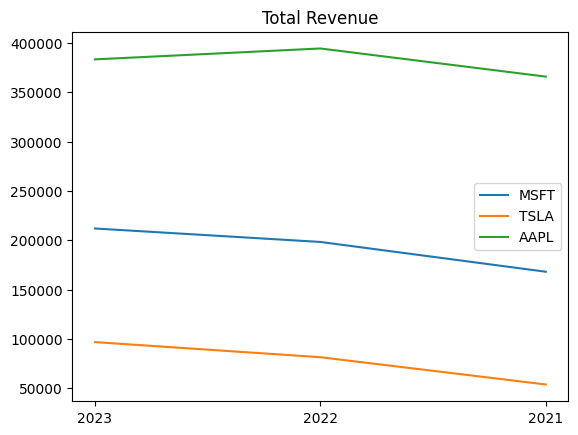

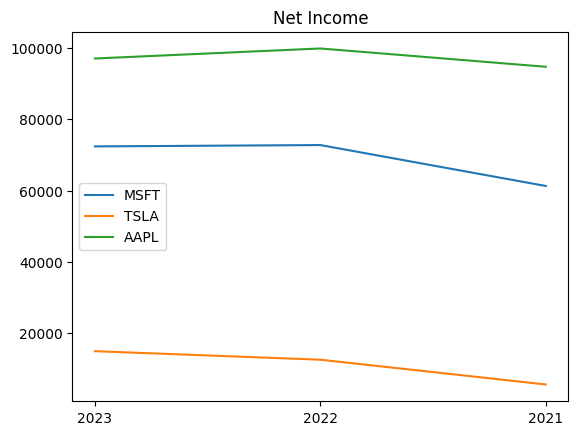

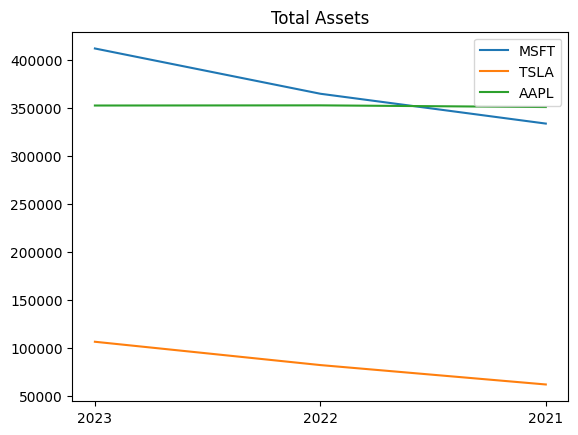

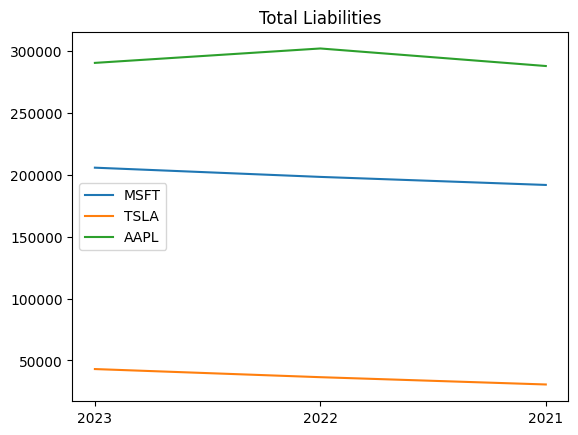

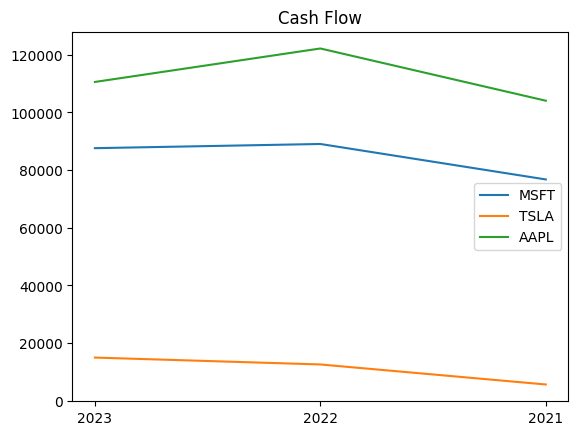

In [13]:
import matplotlib.pyplot as plt
Years=['2023','2022','2021']
for item in financial_data_comparison:
    for i in range(3):
        plt.plot(Years, financial_data_comparison[item].iloc[:,i], label=financial_data_comparison[item].columns.tolist()[i])
    plt.legend()
    plt.title(item)
    plt.show()

### Dictionary of Company's financial data

In [14]:
financial_data=df
for item in financial_data:
    financial_data[item]=financial_data[item].T
financial_data

{'MSFT': MSFT  Total Revenue  Net Income  Total Assets  Total Liabilities  Cash Flow
 2023         211915       72361        411976             205753      87582
 2022         198270       72738        364840             198298      89035
 2021         168088       61271        333779             191791      76740,
 'TSLA': TSLA  Total Revenue  Net Income  Total Assets  Total Liabilities  Cash Flow
 2023          96773       14974        106618              43009      14974
 2022          81462       12587         82338              36440      12587
 2021          53823        5644         62131              30548       5644,
 'AAPL': AAPL  Total Revenue  Net Income  Total Assets  Total Liabilities  Cash Flow
 2023         383285       96995        352583             290437     110543
 2022         394328       99803        352755             302083     122151
 2021         365817       94680        351002             287912     104038}

In [16]:
# Export to Excel with multiple sheets
with pd.ExcelWriter("Dic of company's_finan_data.xlsx") as writer:
    for sheet_name, df in financial_data.items():
        df.to_excel(writer, sheet_name=sheet_name)

### Plotting each company's financial_data to reveal correlation between financial variables

C:\Users\arunj\AppData\Local\Temp\ipykernel_11736\2532537406.py:6: MatplotlibDeprecationWarning: Passing label as a length 5 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(Years, label=financial_data[item].columns.tolist())


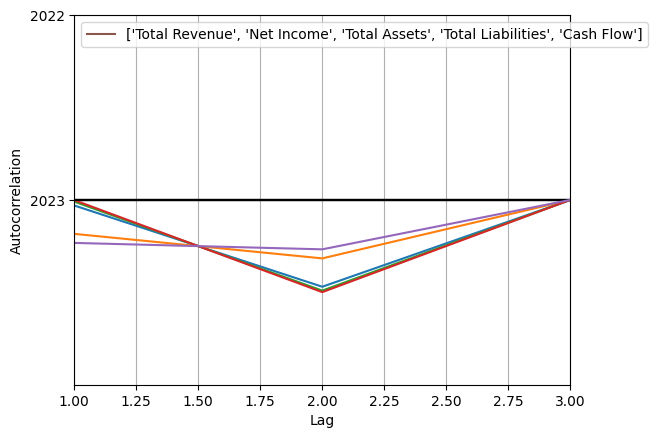

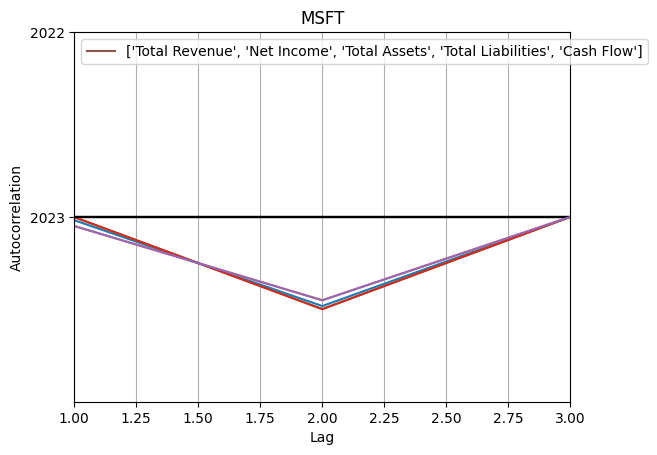

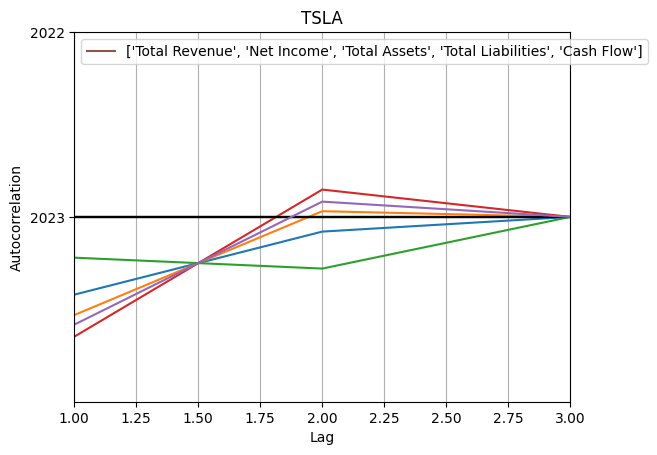

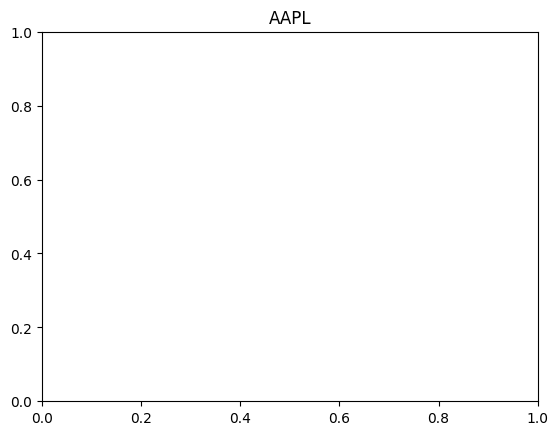

In [6]:
Years=['2023','2022','2021']
for item in financial_data:
    for i in range(len(financial_data[item].columns.tolist())):
        #plt.plot(Years, financial_data[item].iloc[:,i], label=financial_data[item].columns.tolist()[i])
        pd.plotting.autocorrelation_plot(financial_data[item].iloc[:,i])
    plt.plot(Years, label=financial_data[item].columns.tolist())
    plt.legend()
    plt.show()
    plt.title(item)

### Plotting each company's financial data 

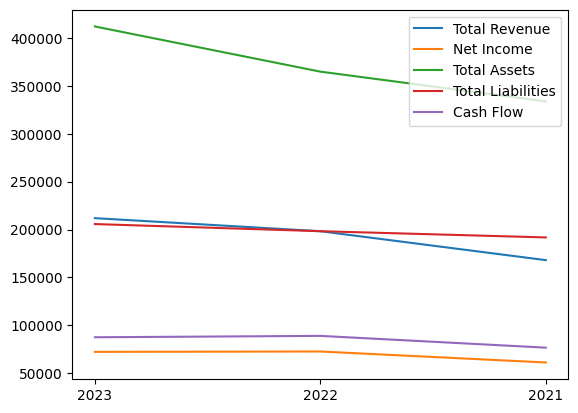

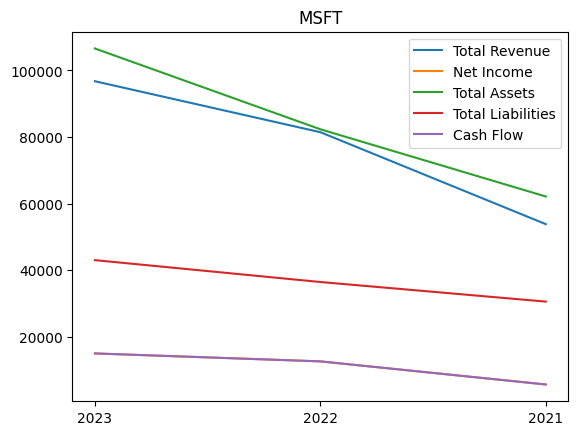

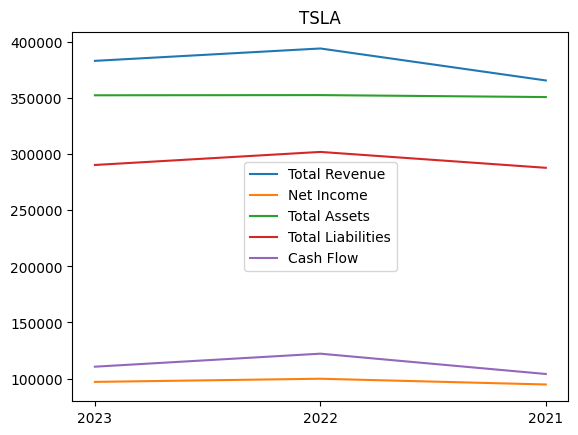

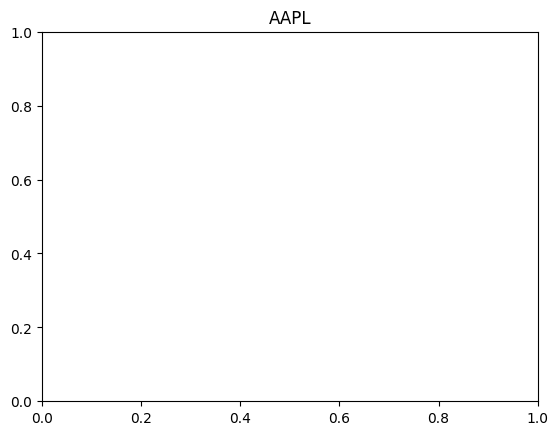

In [7]:
for item in financial_data:
    for i in range(len(financial_data[item].columns.tolist())):
        plt.plot(Years, financial_data[item].iloc[:,i], label=financial_data[item].columns.tolist()[i])
    plt.legend()
    plt.show()
    plt.title(item)

### Evaluating PCT 

In [8]:
financial_stats={}
for item in financial_data:
    dff=pd.DataFrame()
    for ele in financial_data[item].columns.tolist():
        df3=abs(financial_data[item][ele].pct_change()*100).round()
        df3.to_frame()
        dff=pd.concat([dff,df3], axis=1)
    dff.columns=['Revenue Growth', 'Net Income Growth', 'Assets Growth', 'Liabilities Growth', 'Cash Flow Growth']
    financial_stats[item]=dff
financial_stats

{'MSFT':       Revenue Growth  Net Income Growth  Assets Growth  Liabilities Growth  \
 2023             NaN                NaN            NaN                 NaN   
 2022             6.0                1.0           11.0                 4.0   
 2021            15.0               16.0            9.0                 3.0   
 
       Cash Flow Growth  
 2023               NaN  
 2022               2.0  
 2021              14.0  ,
 'TSLA':       Revenue Growth  Net Income Growth  Assets Growth  Liabilities Growth  \
 2023             NaN                NaN            NaN                 NaN   
 2022            16.0               16.0           23.0                15.0   
 2021            34.0               55.0           25.0                16.0   
 
       Cash Flow Growth  
 2023               NaN  
 2022              16.0  
 2021              55.0  ,
 'AAPL':       Revenue Growth  Net Income Growth  Assets Growth  Liabilities Growth  \
 2023             NaN                NaN           

In [9]:
for item in financial_stats:
    financial_stats[item]=financial_stats[item].fillna(0).astype(int)
financial_stats

{'MSFT':       Revenue Growth  Net Income Growth  Assets Growth  Liabilities Growth  \
 2023               0                  0              0                   0   
 2022               6                  1             11                   4   
 2021              15                 16              9                   3   
 
       Cash Flow Growth  
 2023                 0  
 2022                 2  
 2021                14  ,
 'TSLA':       Revenue Growth  Net Income Growth  Assets Growth  Liabilities Growth  \
 2023               0                  0              0                   0   
 2022              16                 16             23                  15   
 2021              34                 55             25                  16   
 
       Cash Flow Growth  
 2023                 0  
 2022                16  
 2021                55  ,
 'AAPL':       Revenue Growth  Net Income Growth  Assets Growth  Liabilities Growth  \
 2023               0                  0           

### Statistical Analysis

In [10]:
for item in financial_data:
    financial_data[item]=pd.concat([financial_data[item],financial_data[item].describe().astype(int)])
financial_data

{'MSFT': MSFT   Total Revenue  Net Income  Total Assets  Total Liabilities  Cash Flow
 2023          211915       72361        411976             205753      87582
 2022          198270       72738        364840             198298      89035
 2021          168088       61271        333779             191791      76740
 count              3           3             3                  3          3
 mean          192757       68790        370198             198614      84452
 std            22427        6514         39372               6986       6718
 min           168088       61271        333779             191791      76740
 25%           183179       66816        349309             195044      82161
 50%           198270       72361        364840             198298      87582
 75%           205092       72549        388408             202025      88308
 max           211915       72738        411976             205753      89035,
 'TSLA': TSLA   Total Revenue  Net Income  Total Assets

In [11]:
for item in financial_data:
    financial_data[item].drop(labels='count',axis=0,inplace=True)
financial_data

{'MSFT': MSFT  Total Revenue  Net Income  Total Assets  Total Liabilities  Cash Flow
 2023         211915       72361        411976             205753      87582
 2022         198270       72738        364840             198298      89035
 2021         168088       61271        333779             191791      76740
 mean         192757       68790        370198             198614      84452
 std           22427        6514         39372               6986       6718
 min          168088       61271        333779             191791      76740
 25%          183179       66816        349309             195044      82161
 50%          198270       72361        364840             198298      87582
 75%          205092       72549        388408             202025      88308
 max          211915       72738        411976             205753      89035,
 'TSLA': TSLA  Total Revenue  Net Income  Total Assets  Total Liabilities  Cash Flow
 2023          96773       14974        106618             

### Plotting Statistical Analysis

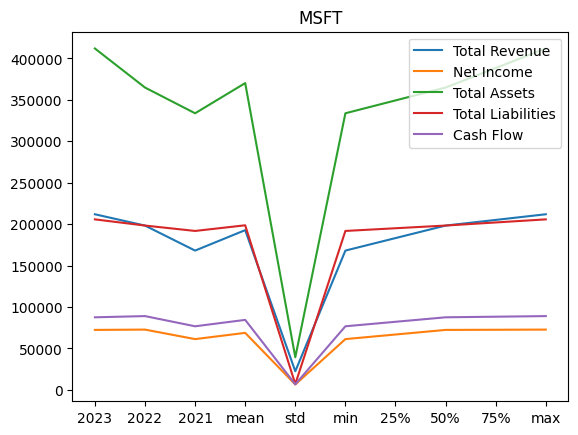

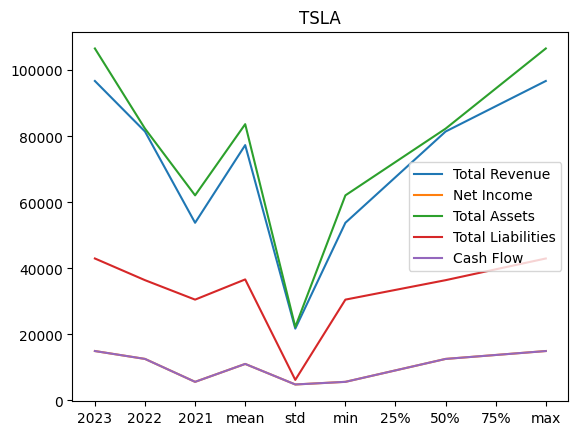

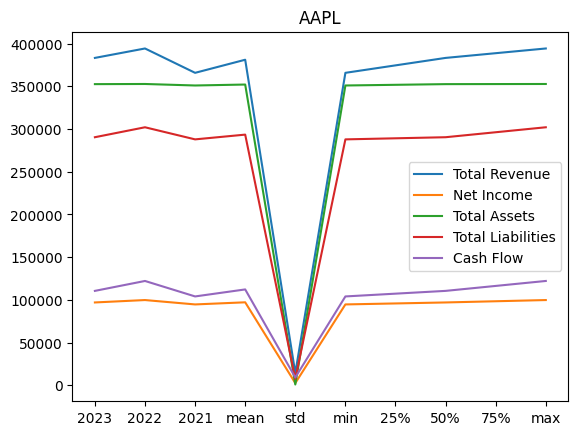

In [12]:
for item in financial_data:
    for i in range(len(financial_data[item].columns.tolist())):
        plt.plot(financial_data[item].index.tolist(), financial_data[item].iloc[:,i], label=financial_data[item].columns.tolist()[i])
    plt.legend()
    plt.title(item)
    plt.show()

In [13]:
pd.options.display.float_format='{:.1f}'.format
for item in financial_data:
    print(financial_data[item].corr())

MSFT               Total Revenue  Net Income  Total Assets  Total Liabilities  \
MSFT                                                                            
Total Revenue                1.0         1.0           1.0                1.0   
Net Income                   1.0         1.0           1.0                1.0   
Total Assets                 1.0         1.0           1.0                1.0   
Total Liabilities            1.0         1.0           1.0                1.0   
Cash Flow                    1.0         1.0           1.0                1.0   

MSFT               Cash Flow  
MSFT                          
Total Revenue            1.0  
Net Income               1.0  
Total Assets             1.0  
Total Liabilities        1.0  
Cash Flow                1.0  
TSLA               Total Revenue  Net Income  Total Assets  Total Liabilities  \
TSLA                                                                            
Total Revenue                1.0         0.9         